In [3]:
import json
import numpy as np
import pandas as pd
import datetime
pd.set_option('max_colwidth', 140)

In [4]:
import os
os.getcwd()

'C:\\Users\\Brad\\Desktop\\Keras - GPU'

In [3]:
dataset = "w266_proj/data/train.json"
df = pd.read_json(dataset,lines=True)

print('finished reading in data file')

finished reading in data file


In [4]:
df.shape

(3804066, 9)

In [4]:
# Orig number of books
df.asin.nunique()

353944

In [4]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,000100039X,"[0, 2]",5,"This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is ...","12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800
1,000100039X,"[7, 9]",5,"A timeless classic. It is a very demanding and assuming title, but Gibran backs it up with some excellent style and content. If he had...","10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800
2,000100039X,"[1, 1]",5,"I discovered The Prophet fifty years ago in college and have read it dozens of times since then. Now, in addition to my beat up hard co...","01 23, 2013",A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200
3,000100039X,"[1, 1]",5,Can't say enough about Kahlil Gibran's work among this piece. Everybody in the whole world should read this! There is almost too much to...,"06 27, 2012",A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200
4,000100039X,"[1, 1]",5,"Cool book, I really like the quality of the production. Black clothbound with gold embossing and nice paper, looks to be cotton rag. I...","02 15, 2012",ARDQ9KNB8K22N,Anwar,"""The Prophet"" is cool",1329264000


In [5]:
# Peel out count of helpful votes into its own column
df['helpful_votes'] = df.apply(lambda x: x.helpful[0],axis=1)
# To avoid confusion later, drop the 'helpful' column at this point
df.drop('helpful', axis = 1, inplace=True)
# Convert reviewTime to datetime type info we can work with
df.reviewTime = pd.to_datetime(df.reviewTime,infer_datetime_format=True)

print('finished creating helpful_votes column')

finished creating helpful_votes column


In [6]:
print("Our dataset initially contains {} reviews".format(df.shape[0]))

Our dataset initially contains 3804066 reviews


In [7]:
# Our dataset snapshot has as its maximum review date 2014-07-23
snapshotted_string = "20140723"
snapshotted = datetime.datetime.strptime(snapshotted_string, '%Y%m%d')

# We will DROP reviews less than one year old
# They may not have accumulated enough evidence to support being helpful or not
ourcutoff = snapshotted - datetime.timedelta(days=365)
df = df[df.reviewTime < ourcutoff]

print('task complete')
print("After removing reviews less than one year old, our dataset contains {} reviews".format(df.shape[0]))
print("After removing reviews less than one year old, our dataset contains {} unique books".format(df.asin.nunique()))

task complete
After removing reviews less than one year old, our dataset contains 2884665 reviews
After removing reviews less than one year old, our dataset contains 301794 unique books


In [8]:
# Here we store the age of each review in days
df['review_age_days'] = df.apply(lambda x: (snapshotted - x.reviewTime).days,axis = 1)

print('task complete')

task complete


In [11]:
df.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days
0,000100039X,5,"This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is ...",2003-12-11,A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,0,3877
1,000100039X,5,"A timeless classic. It is a very demanding and assuming title, but Gibran backs it up with some excellent style and content. If he had...",2002-10-07,A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,7,4307
2,000100039X,5,"I discovered The Prophet fifty years ago in college and have read it dozens of times since then. Now, in addition to my beat up hard co...",2013-01-23,A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200,1,546
3,000100039X,5,Can't say enough about Kahlil Gibran's work among this piece. Everybody in the whole world should read this! There is almost too much to...,2012-06-27,A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200,1,756
4,000100039X,5,"Cool book, I really like the quality of the production. Black clothbound with gold embossing and nice paper, looks to be cotton rag. I...",2012-02-15,ARDQ9KNB8K22N,Anwar,"""The Prophet"" is cool",1329264000,1,889


In [9]:
# We create the annual HVAR score
df['annual_HVAR'] = df.apply(lambda x: 365*x.helpful_votes/x.review_age_days, axis = 1)

print('task complete')

task complete


In [13]:
df.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,annual_HVAR
0,000100039X,5,"This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is ...",2003-12-11,A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,0,3877,0.000000
1,000100039X,5,"A timeless classic. It is a very demanding and assuming title, but Gibran backs it up with some excellent style and content. If he had...",2002-10-07,A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,7,4307,0.593220
2,000100039X,5,"I discovered The Prophet fifty years ago in college and have read it dozens of times since then. Now, in addition to my beat up hard co...",2013-01-23,A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200,1,546,0.668498
3,000100039X,5,Can't say enough about Kahlil Gibran's work among this piece. Everybody in the whole world should read this! There is almost too much to...,2012-06-27,A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200,1,756,0.482804
4,000100039X,5,"Cool book, I really like the quality of the production. Black clothbound with gold embossing and nice paper, looks to be cotton rag. I...",2012-02-15,ARDQ9KNB8K22N,Anwar,"""The Prophet"" is cool",1329264000,1,889,0.410574


In [10]:
# Now we group by the book id
# And aggregate by count of unique reviews for the given book
# (We count using unixReviewTime as a proxy for uniqueness because there's no review ID provided)
# We also aggregate the HVAR within groups by its standard deviation
# As we cannot retrieve a signal with respect to helpfulness if reviews don't have variance 
#by_book = df.groupby('asin').agg({'unixReviewTime':'size','annual_HVAR': lambda x: (x.std(),x.quantile(.75))})

by_book = df.groupby('asin').agg({'unixReviewTime':'size', 'annual_HVAR': lambda x: (x.std(),x.quantile(.75), x.min(), x.max())})
#by_book['HVAR_list'] = df.groupby('asin')['annual_HVAR'].apply(list)

print('group/agg task complete')

group/agg task complete


In [15]:
by_book.head()

,unixReviewTime,annual_HVAR,HVAR_list
asin,,,
000100039X,86,"(2.93028667863172, 0.8427020856365862, 0.0, 24.302026375040207)","[0.0, 0.5932203389830508, 0.6684981684981685, 0.4828042328042328, 0.41057367829021374, 0.2782012195121951, 2.1147161066048668, 0.1651583..."
0001055178,12,"(0.3329110625136101, 0.4658564516461648, 0.0, 1.0454458659537904)","[0.0, 0.6228668941979523, 0.41351963746223563, 0.13844111511473545, 1.0454458659537904, 0.15459551037695893, 0.7690686894226717, 0.07544..."
0001473123,3,"(1.149614543750477, 1.5265507518796992, 0.2345758354755784, 2.401315789473684)","[0.6517857142857143, 0.2345758354755784, 2.401315789473684]"
0001473727,3,"(0.06947782796254756, 0.75650592951592, 0.6364428945074107, 0.7612095933263816)","[0.7612095933263816, 0.7518022657054583, 0.6364428945074107]"
0001473905,2,"(0.3117132947205131, 0.7106322879684571, 0.3800104112441437, 0.820839580209895)","[0.820839580209895, 0.3800104112441437]"


In [16]:
by_book.shape

(301794, 3)

In [17]:
#train_hvar_list = by_book[['HVAR_list']].copy()

In [18]:
#type(train_hvar_list)

pandas.core.frame.DataFrame

In [19]:
#train_hvar_list.shape


(301794, 1)

In [33]:
#train_hvar_list.head()

,HVAR_list
asin,
000100039X,"[0.0, 0.5932203389830508, 0.6684981684981685, 0.4828042328042328, 0.41057367829021374, 0.2782012195121951, 2.1147161066048668, 0.1651583..."
0001055178,"[0.0, 0.6228668941979523, 0.41351963746223563, 0.13844111511473545, 1.0454458659537904, 0.15459551037695893, 0.7690686894226717, 0.07544..."
0001473123,"[0.6517857142857143, 0.2345758354755784, 2.401315789473684]"
0001473727,"[0.7612095933263816, 0.7518022657054583, 0.6364428945074107]"
0001473905,"[0.820839580209895, 0.3800104112441437]"


In [34]:
#train_hvar_list.to_pickle('train_hvar_list.pkl')

In [11]:
# Extract standard deviation to filter out zero-valued books later
# - no reviews with no variation; no variation is bad
by_book['std_HVAR'] = by_book.apply(lambda x: x.annual_HVAR[0],axis = 1)
# Extract top quartile cutoff per book
by_book['top_quartile_HVAR'] = by_book.apply(lambda x: x.annual_HVAR[1],axis = 1)

#by_book['min_max'] = by_book.apply(lambda x: (x.annual_HVAR[2], x.annual_HVAR[3]), axis=1)

In [18]:
by_book.head()

,unixReviewTime,annual_HVAR,HVAR_list,std_HVAR,top_quartile_HVAR
asin,,,,,
000100039X,86,"(2.93028667863172, 0.8427020856365862, 0.0, 24.302026375040207)","[0.0, 0.5932203389830508, 0.6684981684981685, 0.4828042328042328, 0.41057367829021374, 0.2782012195121951, 2.1147161066048668, 0.1651583...",2.930287,0.842702
0001055178,12,"(0.3329110625136101, 0.4658564516461648, 0.0, 1.0454458659537904)","[0.0, 0.6228668941979523, 0.41351963746223563, 0.13844111511473545, 1.0454458659537904, 0.15459551037695893, 0.7690686894226717, 0.07544...",0.332911,0.465856
0001473123,3,"(1.149614543750477, 1.5265507518796992, 0.2345758354755784, 2.401315789473684)","[0.6517857142857143, 0.2345758354755784, 2.401315789473684]",1.149615,1.526551
0001473727,3,"(0.06947782796254756, 0.75650592951592, 0.6364428945074107, 0.7612095933263816)","[0.7612095933263816, 0.7518022657054583, 0.6364428945074107]",0.069478,0.756506
0001473905,2,"(0.3117132947205131, 0.7106322879684571, 0.3800104112441437, 0.820839580209895)","[0.820839580209895, 0.3800104112441437]",0.311713,0.710632


In [13]:
# Drop the combo column now that we have them separated
by_book.drop('annual_HVAR',axis=1,inplace=True)

# Drop the HVAR_list column
#by_book.drop('HVAR_list', axis=1, inplace=True)

# Rename for clarity when filtering by this column later
by_book.rename(columns={"unixReviewTime": "book_num_reviews"}, inplace=True)

print('task complete')

KeyError: "['annual_HVAR'] not found in axis"

In [14]:
by_book.columns

Index(['unixReviewTime', 'std_HVAR', 'top_quartile_HVAR'], dtype='object')

In [24]:
# Now print out resulting size of review dataset
print("There are {} unique books in this dataset".format(by_book.shape[0]))
# by_book.rename(columns={"unixReviewTime": "book_num_reviews","annual_HVAR":"std_HVAR"}, inplace=True)
print("{} reviews will remain after final filters applied".format(by_book[(by_book.book_num_reviews >=4)\
    & (by_book.std_HVAR != 0)].book_num_reviews.sum()))

There are 301794 unique books in this dataset
2659724 reviews will remain after final filters applied


In [22]:
by_book.head()

,book_num_reviews,std_HVAR,top_quartile_HVAR
asin,,,
000100039X,86,2.930287,0.842702
0001055178,12,0.332911,0.465856
0001473123,3,1.149615,1.526551
0001473727,3,0.069478,0.756506
0001473905,2,0.311713,0.710632


In [20]:
# Save this off because will use the cutoff to label the dev and test sets
by_book.to_csv('w266_proj/data/book_cutoffs.csv',index=True)

In [25]:
df.asin.nunique()

301794

In [15]:
# We join the review_counts and std_HVAR plus cutoff values back onto the original dataframe
df = df.join(by_book,on='asin')

ValueError: columns overlap but no suffix specified: Index(['unixReviewTime'], dtype='object')

In [27]:
df.asin.nunique()

301794

In [28]:
# And we filter down that original dataframe to contain only the reviews we'll be labeling
df = df[(df.book_num_reviews >=4) & (~df.std_HVAR.isnull()) & (df.std_HVAR > 0)]

print('join/filter task complete')

join/filter task complete


In [35]:
df.asin.nunique()

197298

In [36]:
print(f"{df.book_num_reviews.isna().sum()} reviews in the test set get dropped for books having inadequate review counts/variance")

0 reviews in the test set get dropped for books having inadequate review counts/variance


In [37]:
train_hvar_list = pd.DataFrame(df.groupby('asin')['annual_HVAR'].apply(list))
train_hvar_list.to_pickle('train_hvar_list.pkl')

In [24]:
df.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR
0,000100039X,5,"This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is ...",2003-12-11,A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,0,3877,0.000000,86,2.930287,0.842702
1,000100039X,5,"A timeless classic. It is a very demanding and assuming title, but Gibran backs it up with some excellent style and content. If he had...",2002-10-07,A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,7,4307,0.593220,86,2.930287,0.842702
2,000100039X,5,"I discovered The Prophet fifty years ago in college and have read it dozens of times since then. Now, in addition to my beat up hard co...",2013-01-23,A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200,1,546,0.668498,86,2.930287,0.842702
3,000100039X,5,Can't say enough about Kahlil Gibran's work among this piece. Everybody in the whole world should read this! There is almost too much to...,2012-06-27,A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200,1,756,0.482804,86,2.930287,0.842702
4,000100039X,5,"Cool book, I really like the quality of the production. Black clothbound with gold embossing and nice paper, looks to be cotton rag. I...",2012-02-15,ARDQ9KNB8K22N,Anwar,"""The Prophet"" is cool",1329264000,1,889,0.410574,86,2.930287,0.842702


In [38]:
# Retain the most_helpful column for easy model comparisons using the same data set

# And now we label the reviews that are in the top quartile as 'most_helpful' = 1 (otherwise 0)
df['most_helpful'] = df.apply(lambda x: int(x.annual_HVAR > x.top_quartile_HVAR),axis = 1)

In [39]:
df.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful
0,000100039X,5,"This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is ...",2003-12-11,A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,0,3877,0.000000,86,2.930287,0.842702,0
1,000100039X,5,"A timeless classic. It is a very demanding and assuming title, but Gibran backs it up with some excellent style and content. If he had...",2002-10-07,A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,7,4307,0.593220,86,2.930287,0.842702,0
2,000100039X,5,"I discovered The Prophet fifty years ago in college and have read it dozens of times since then. Now, in addition to my beat up hard co...",2013-01-23,A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200,1,546,0.668498,86,2.930287,0.842702,0
3,000100039X,5,Can't say enough about Kahlil Gibran's work among this piece. Everybody in the whole world should read this! There is almost too much to...,2012-06-27,A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200,1,756,0.482804,86,2.930287,0.842702,0
4,000100039X,5,"Cool book, I really like the quality of the production. Black clothbound with gold embossing and nice paper, looks to be cotton rag. I...",2012-02-15,ARDQ9KNB8K22N,Anwar,"""The Prophet"" is cool",1329264000,1,889,0.410574,86,2.930287,0.842702,0


In [38]:
df.describe()

,overall,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful
count,2.659724e+06,2.659724e+06,2.659724e+06,2.659724e+06,2.659724e+06,2.659724e+06,2.659724e+06,2.659724e+06,2.659724e+06
mean,4.062264e+00,1.250677e+09,6.873003e+00,1.798567e+03,1.638847e+00,7.228011e+01,3.423575e+00,1.546325e+00,2.551223e-01
std,1.214404e+00,1.165529e+08,3.212692e+01,1.348992e+03,1.078598e+01,1.906397e+02,1.010235e+01,1.830221e+00,4.359300e-01
min,1.000000e+00,8.356608e+08,0.000000e+00,3.660000e+02,0.000000e+00,4.000000e+00,1.199178e-16,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.177114e+09,1.000000e+00,6.570000e+02,2.874016e-01,9.000000e+00,7.016173e-01,6.962725e-01,0.000000e+00
50%,5.000000e+00,1.290643e+09,2.000000e+00,1.336000e+03,6.552962e-01,2.100000e+01,1.507532e+00,1.053545e+00,0.000000e+00
75%,5.000000e+00,1.349309e+09,5.000000e+00,2.650000e+03,1.367041e+00,5.500000e+01,3.342689e+00,1.796034e+00,1.000000e+00
max,5.000000e+00,1.374451e+09,2.331100e+04,6.602000e+03,1.026359e+04,2.472000e+03,3.786433e+02,1.286417e+02,1.000000e+00


In [40]:
df.asin.nunique()

197298

In [41]:
# Save Progress!
# - This pickle is the training data frame ready for label calculations

df.to_pickle('train_label_ready.pkl')

In [1]:
# Determine Labels through clustering

# Load global per-book min-max, mean, and standard deviation values
# Calculated from ALL per-book annual HVAR values in train and dev sets only
import pickle

global_min_max_pkl = open('global_min_max.pkl','rb')
global_min_max = pickle.load(global_min_max_pkl)
global_min_max_pkl.close()

In [2]:
# Made a mistake?, reload df
train_label_ready_pkl = open('train_label_ready.pkl', 'rb')
df = pickle.load(train_label_ready_pkl)
train_label_ready_pkl.close()

In [7]:
global_min_max.isnull().sum()

min_max    0
mean_sd    0
dtype: int64

In [8]:
global_min_max.head()

,min_max,mean_sd
asin,,
000100039X,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)"
0001055178,"(0.0, 1.0454458659537904)","(0.3033125129582897, 0.30804662529148785)"
0001712772,"(0.08782483156881617, 1.4056482670089858)","(0.7099407251829095, 0.49265711624864933)"
0001714538,"(0.0, 0.2407651715039578)","(0.13260520400101836, 0.08602698143460721)"
0002005395,"(0.20402459474566798, 1.0080341451167463)","(0.5565624088756161, 0.27842222517588405)"


In [9]:
# 171059 unique book ids
# - Has this shape because it came from train_hvar_list, which came from
global_min_max.shape

(197298, 2)

In [47]:
# global_min_max asin is the index
global_min_max.index[:5]

Index(['000100039X', '0001055178', '0001712772', '0001714538', '0002005395'], dtype='object', name='asin')

In [10]:
# df asin is a column
df.asin.nunique()

197298

In [9]:
df.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful
0,000100039X,5,"This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is ...",2003-12-11,A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,0,3877,0.000000,86,2.930287,0.842702,0
1,000100039X,5,"A timeless classic. It is a very demanding and assuming title, but Gibran backs it up with some excellent style and content. If he had...",2002-10-07,A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,7,4307,0.593220,86,2.930287,0.842702,0
2,000100039X,5,"I discovered The Prophet fifty years ago in college and have read it dozens of times since then. Now, in addition to my beat up hard co...",2013-01-23,A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200,1,546,0.668498,86,2.930287,0.842702,0
3,000100039X,5,Can't say enough about Kahlil Gibran's work among this piece. Everybody in the whole world should read this! There is almost too much to...,2012-06-27,A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200,1,756,0.482804,86,2.930287,0.842702,0
4,000100039X,5,"Cool book, I really like the quality of the production. Black clothbound with gold embossing and nice paper, looks to be cotton rag. I...",2012-02-15,ARDQ9KNB8K22N,Anwar,"""The Prophet"" is cool",1329264000,1,889,0.410574,86,2.930287,0.842702,0


In [3]:
# Join on asin
df = df.join(global_min_max, on='asin')

In [12]:
# check for missing min_max values after the join, where did they come from?
df.min_max.isnull().sum()

0

In [11]:
df.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful,min_max,mean_sd
0,000100039X,5,This is one my must have books. It is a master...,2003-12-11,A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,0,3877,0.000000,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)"
1,000100039X,5,A timeless classic. It is a very demanding an...,2002-10-07,A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,7,4307,0.593220,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)"
2,000100039X,5,I discovered The Prophet fifty years ago in co...,2013-01-23,A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200,1,546,0.668498,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)"
3,000100039X,5,Can't say enough about Kahlil Gibran's work am...,2012-06-27,A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200,1,756,0.482804,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)"
4,000100039X,5,"Cool book, I really like the quality of the pr...",2012-02-15,ARDQ9KNB8K22N,Anwar,"""The Prophet"" is cool",1329264000,1,889,0.410574,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)"


In [12]:
# Min max scale annual_hvar column within book groups

#def minMax(x):
    #return (x-min(x))/(max(x)-min(x))

#df['scaled'] = df['annual_HVAR'].groupby(df['asin']).transform(minMax)

#print('scaling task complete')

In [13]:
# Min max scale individual reviews using the global min-max values in the min_max column

def global_min_max(row):
    #print('current row: {}'.format(row))
    x = row['annual_HVAR']
    
    try:
        minimum = row['min_max'][0]
    except TypeError:
        print('type error on min calc: {}'.format(row))
        #raise TypeError('you are a dummy!')
        
    try:
        maximum = row['min_max'][1]
    except TypeError:
        print('type error on max calc: {}'.format(row))
        return
    
    try:
        scaled_value = (x-minimum)/(maximum-minimum)
    except ZeroDivisionError:
        # Failed to find reviews for the same book with zero variance
        print('ZeroDivisionError on scaling calc for: {}'.format(row))
        raise ZeroDivisionError('Evaluate the error and try to catch it or remove the offending data')
        
    return scaled_value


#df['scaled'] = df[['annual_HVAR', 'min_max']].transform(global_min_max)

In [14]:
# offending example; asin = 'B00CD6SKXS'
df[df['asin'] == 'B00CD6SKXS']

# looks like a fake review
# - 7 reviews
# - all with 1 helpful vote, the same review age, same star rating 

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful,min_max,mean_sd
1874551,B00CD6SKXS,5,"Although not written in first person, I felt myself identifying with the hero completely, making reading this story very enjoyable. Reco...",2013-04-21,A28MPK002D2WJ1,AA,Very enjoyable. Recommended.,1366502400,1,458,0.796943,7,1.199178e-16,0.796943,0,"(0.7969432314410481, 0.7969432314410481)","(0.7969432314410481, 0.0)"
1874552,B00CD6SKXS,5,"No one plans to divorce, and I certainly don't, yet I can understand what one goes through while divorcing and once it's over.This story...",2013-04-21,A380C702FXX01N,David Gur,Makes the reader feel like he knows the characters.,1366502400,1,458,0.796943,7,1.199178e-16,0.796943,0,"(0.7969432314410481, 0.7969432314410481)","(0.7969432314410481, 0.0)"
1874553,B00CD6SKXS,5,"It's lovely, the way the daughter tries to make her divorced parents cooperate at her wedding. Like the rest of the story, it shows a re...",2013-04-21,A2Y9W5LMRFQ9VR,galiakoplis,"Realistic, yet optimistic view of life",1366502400,1,458,0.796943,7,1.199178e-16,0.796943,0,"(0.7969432314410481, 0.7969432314410481)","(0.7969432314410481, 0.0)"
1874554,B00CD6SKXS,5,"I've seen some of my friends go through divorce. Most were painful, as described in this story. Most managed to find new loves in their ...",2013-04-21,A2G5FUEN1R1QBG,omri,Like reading a personal experience,1366502400,1,458,0.796943,7,1.199178e-16,0.796943,0,"(0.7969432314410481, 0.7969432314410481)","(0.7969432314410481, 0.0)"
1874555,B00CD6SKXS,5,Some scenes made me smile and others made me nod my head understandingly. Living alone after being married for many years may be very di...,2013-04-21,A26K09X3RG2HD2,talpaz,A good reading book,1366502400,1,458,0.796943,7,1.199178e-16,0.796943,0,"(0.7969432314410481, 0.7969432314410481)","(0.7969432314410481, 0.0)"
2826852,B00CD6SKXS,4,"Love may jump on us when we least expect, as this story shows. I like the interaction between the hero and the women in his life. It fee...",2013-04-21,AR0PJVJF0VMGO,doron,It feels like a real story,1366502400,1,458,0.796943,7,1.199178e-16,0.796943,0,"(0.7969432314410481, 0.7969432314410481)","(0.7969432314410481, 0.0)"
2826853,B00CD6SKXS,4,"It seemed weird to call a story about a divorcee a romance, yet it is. Romance can be found even in unexpected places, like at the super...",2013-04-21,A1WY4550YF5AKG,rachel yakir,Liked it very much!,1366502400,1,458,0.796943,7,1.199178e-16,0.796943,0,"(0.7969432314410481, 0.7969432314410481)","(0.7969432314410481, 0.0)"


In [4]:
# drop offending rows for potentially fake reviews
df = df[df['asin'] != 'B00CD6SKXS']

In [16]:
df.asin.nunique() # one less book to deal with

197297

In [17]:
df['scaled'] = df[['annual_HVAR', 'min_max']].apply(global_min_max, axis=1)

In [5]:
# label by within-book z-score normalization (standardization)

#def z_calc(x):
    #return (x - np.mean(x))/np.std(x, ddof=0)
    
def z_calc(row):
    x = row['annual_HVAR']
    mean = row['mean_sd'][0]
    std = row['mean_sd'][1]
    normalized = (x - mean)/std
    return normalized

df['group_z'] = df[['annual_HVAR','mean_sd']].apply(z_calc, axis=1)

In [16]:
! pip install matplotlib

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


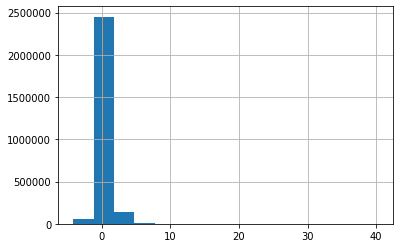

In [11]:
# histogram of group_z

hist = df['group_z'].hist(bins=15)

In [19]:
df.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,annual_HVAR,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful,min_max,mean_sd,scaled,group_z
0,000100039X,5,"This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is ...",2003-12-11,A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,0,3877,0.000000,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)",0.000000,-0.368577
1,000100039X,5,"A timeless classic. It is a very demanding and assuming title, but Gibran backs it up with some excellent style and content. If he had...",2002-10-07,A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,7,4307,0.593220,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)",0.024410,-0.142781
2,000100039X,5,"I discovered The Prophet fifty years ago in college and have read it dozens of times since then. Now, in addition to my beat up hard co...",2013-01-23,A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,1358899200,1,546,0.668498,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)",0.027508,-0.114128
3,000100039X,5,Can't say enough about Kahlil Gibran's work among this piece. Everybody in the whole world should read this! There is almost too much to...,2012-06-27,A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,1340755200,1,756,0.482804,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)",0.019867,-0.184808
4,000100039X,5,"Cool book, I really like the quality of the production. Black clothbound with gold embossing and nice paper, looks to be cotton rag. I...",2012-02-15,ARDQ9KNB8K22N,Anwar,"""The Prophet"" is cool",1329264000,1,889,0.410574,86,2.930287,0.842702,0,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)",0.016895,-0.212301


In [13]:
# Use kmeans clustering to bucket scaled values
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')

In [21]:
df['class'] = est.fit_transform(df[['scaled']])

print('min-max cluster labeling task complete')

min-max cluster labeling task complete


In [14]:
df['group_z_class'] = est.fit_transform(df[['group_z']])

In [24]:
# hist of class 1; should see typical range for values in cluster

#hist_1 = df[df['group_z_class'] == 1.0]['group_z'].hist()
print(df[df['group_z_class'] == 1.0]['group_z'].describe())

count    311442.000000
mean          2.165051
std           1.370018
min           0.940726
25%           1.339911
50%           1.804950
75%           2.491311
max          40.224924
Name: group_z, dtype: float64


In [25]:
print(df[df['group_z_class'] == 0.0]['group_z'].describe())

count    2.348275e+06
mean    -2.874896e-01
std      4.219843e-01
min     -4.117767e+00
25%     -5.239676e-01
50%     -2.989355e-01
75%     -9.189741e-02
max      9.407170e-01
Name: group_z, dtype: float64


In [23]:
df['class'].value_counts()

0.0    2262997
1.0     396720
Name: class, dtype: int64

In [24]:
# Even more restrictive criteria
df['group_z_class'].value_counts()

0.0    2348275
1.0     311442
Name: group_z_class, dtype: int64

In [25]:
df[df['class'] != df['group_z_class']][:5]

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_votes,review_age_days,...,book_num_reviews,std_HVAR,top_quartile_HVAR,most_helpful,min_max,mean_sd,scaled,group_z,class,group_z_class
8,000100039X,5,This is one of the first (literary) books I recall reading. My mother kept a collection of Gibran's works that she often read. I was cur...,2000-06-24,A1NPNGWBVD9AK3,"Bruce Kendall ""BEK""",Simple Wisdom,961804800,81,5142,...,86,2.930287,0.842702,1,"(0.0, 24.302026375040207)","(0.9683401157041025, 2.6272423654684296)",0.236594,1.819919,0.0,1.0
79,0001712772,5,Beginning with &quot;The first six words I'll teach my pup are 'dig a hole' and 'fill it up.'&quot; this book is absolutely hilarious. ...,2000-06-17,A2VU7WW0V4X83G,David Chaumette,I love this book.,961200000,15,5149,...,4,0.635544,1.148897,0,"(0.08782483156881617, 1.4056482670089858)","(0.7099407251829095, 0.49265711624864933)",0.740227,0.717279,1.0,0.0
84,0001714538,5,This book is so cute and so much fun! We borrowed this book from our local library and then I just had to own it. My kids didn't want to...,2007-07-02,APFJU5FXJMLRD,"D. James ""D. James""",The Berenstain Bears on the Moon,1183334400,1,2578,...,4,0.099335,0.171246,0,"(0.0, 0.2407651715039578)","(0.13260520400101836, 0.08602698143460721)",0.588053,0.104356,1.0,0.0
85,0001714538,5,"&quot;The Berenstain Bears on the Moon,&quot; by Stan and Jan Berenstain, is one of the best in the authors' excellent series of childre...",2001-01-22,A3QZCA4LTTVGAD,Michael J. Mazza,The Bears go sci-fi!,980121600,2,4930,...,4,0.099335,0.171246,0,"(0.0, 0.2407651715039578)","(0.13260520400101836, 0.08602698143460721)",0.615010,0.179802,1.0,0.0
354,0002007770,5,"Although it is only April, I predict that Water for Elephants by Sara Gruen will be one of the best books I read this year. Gruen has p...",2007-04-18,A39ABKRS1MKFTW,Cynthia K. Robertson,One of the best books I've read this year...,1176854400,362,2653,...,1554,6.089645,0.657658,1,"(0.0, 185.6243705941591)","(0.776045557824641, 5.458085823676727)",0.268305,8.982627,0.0,1.0


In [26]:
df['class'].sum()/df.shape[0]

0.14915872628554092

In [27]:
df['group_z_class'].sum()/df.shape[0]

0.11709591659563781

In [28]:
# rename column

df.rename(columns = {'class':'class_2'}, inplace = True)

In [ ]:
# Write it out to a file
# - This modified training set contains two new label columns generated by kmeans clustering min-max scaled annual_HVAR values
df.to_csv('w266_proj/data/labeled_training_set_clust_FINAL.csv',index=False)